In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
#normalize the data...helps to scale up the pixel intensity in 0 & 1...helps to speed up the training

x_train = x_train/ 255
x_test = x_test/ 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

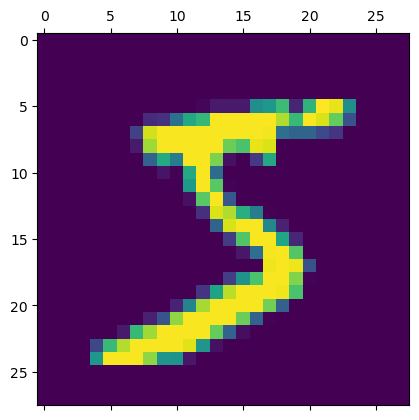

In [12]:
plt.matshow(x_train[0])

In [13]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)), #INPUT
    keras.layers.Dense(128, activation='relu'), #
    keras.layers.Dense(10, activation='softmax') #OUPUT LAYER
    
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])


In [16]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6530 - accuracy: 0.8349 - val_loss: 0.3613 - val_accuracy: 0.9050
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.9043 - val_loss: 0.2999 - val_accuracy: 0.9181
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.9168 - val_loss: 0.2708 - val_accuracy: 0.9252
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9250 - val_loss: 0.2513 - val_accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9314 - val_loss: 0.2311 - val_accuracy: 0.9355
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2268 - accuracy: 0.9366 - val_loss: 0.2171 - val_accuracy: 0.9375
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2109 - accuracy: 0.9415 - val_loss: 0.2029 - val_accuracy:

In [17]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.8f" %test_loss)
print("Acc=%.8f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9496
Loss=0.17351596
Acc=0.94959998


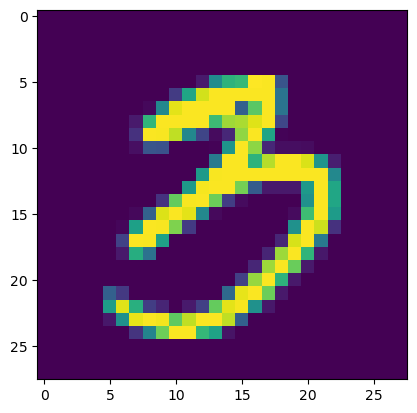

In [18]:
n= random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [21]:
predicted_value=model.predict(x_test)
print("value is = %d" %np.argmax(predicted_value[n]) )

313/313 [==============================] - 0s 1ms/step
value is = 3


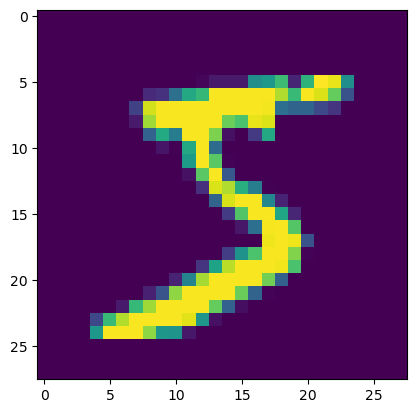

In [23]:
plt.imshow(x_train[0])
plt.show()

In [24]:
# Predict using the model and print the predicted value for x_train[n]
predicted_values = model.predict(np.expand_dims(x_train[0], axis=0))  # Expand dimensions for single sample prediction
print("Predicted value = %d" %np.argmax(predicted_values))

1/1 [==============================] - 0s 24ms/step
Predicted value = 5


In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

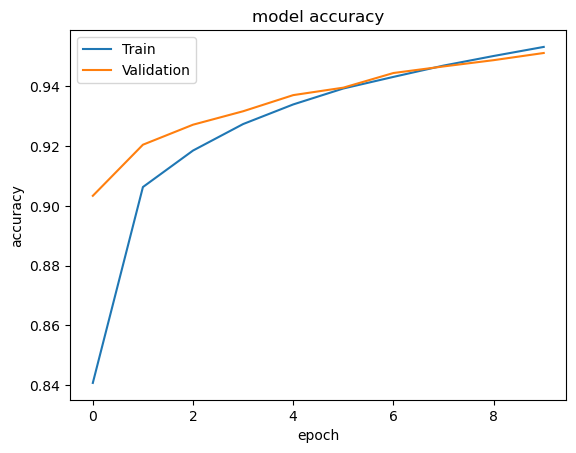

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

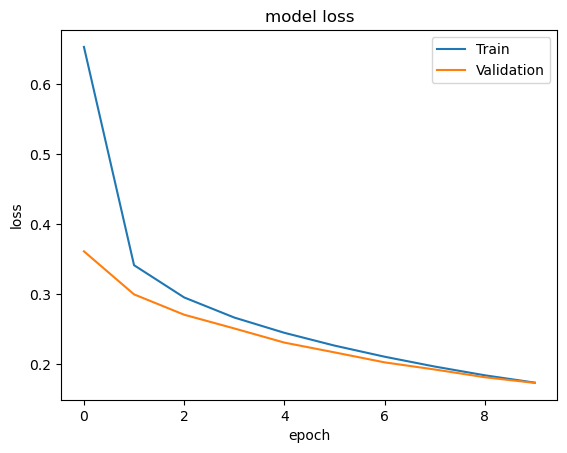

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()


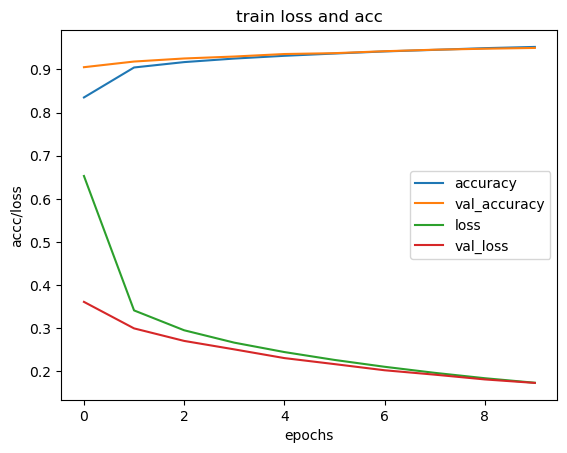

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('train loss and acc')

plt.ylabel('accc/loss')
plt.xlabel('epochs')
plt.legend(['accuracy','val_accuracy','loss','val_loss'])


plt.show()
